In [2]:
## Normal Setup stuff
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)
from __future__ import division ## Python 3.0 returns the quotient in decimal form 

## Function Description
The purpose of this function is to modulate the desired drive position based on the deviation of the individual EMG inputs off thier respective baseline.  The amount the drive position changes is based on how far the current input signal is off of its base line.  From that delta the incrementer  is selected from three distinct catagories.  The direction is determined based on which channel contains  the higher magnatude signal.  Towards the output the signal is checked to make sure it is  within the movemnt limits of the device before being fed into the PID controller.

In [3]:
## Defined Constants

EMG_1_Base = 2     ## Establishes the baseline for the channel 1 EMG sensor
EMG_2_Base = 2     ## Establishes the baseline for the channel 2 EMG sensor

drive_pace_1 = 1     ## Set the low level pace desired pos incrementer 
drive_pace_2 = 3     ## Set the medium level pace desired pos incrementer
drive_pace_3 = 5     ## Se the high level pace desirec pos incrementer

pace_1_thres = 0.1     ## Set the low level threshold for the drive position incrementor
pace_2_thres = 0.3     ## Set the medium level threshold for the drive position incrementor
pace_3_thres = 0.5     ## Set the high level threshold for the drive position incrementor 

lower_drive_limit = 25     ##Set the software hard stop lower limit that the output can drive to
upper_drive_limit = 135     ##Set the doftware hard stop upper limit that the output can drive to

## Function Inputs
EMG_1_sig = 2
EMG_2_sig = 10

initial_pos  = 90


## Function Description
## The purpose of this function is to modulate the desired drive position based on the deviation 
## of the individual EMG inputs off thier respective baseline.  The amount the drive position changes
## is based on how far the current input signal is off of its base line.  From that delta the incrementer 
## is selected from three distinct catagories.  The direction is determined based on which channel contains 
## the higher magnatude signal.  Towards the output the signal is checked to make sure it is  within the movemnt 
## limits of the device before being fed into the PID controller.


## Fucntion Definition
def EMG_Pos_Ctrl (drive_pos,EMG1 , EMG2):
        
    EMG_1_delta = (EMG1) - EMG_1_Base     ##Determine what the deviation from the baseline is
    EMG_2_delta = (EMG2) - EMG_2_Base     ##Determine what the deviation form the baseline is
    
    EMG_1_max = 100     ## This is the users EMG Ceiling for the channel 1 EMG
    EMG_2_max = 100     ## This is the users EMG Ceiling for the channel 2 EMG
    
    pace = 0     ## value being added to the desired position in order 
                     ## to modify the positional setpoint based on the EMG signal
    
    ## Determine the driving direction of the system, if EMG1 systhem will drive up
    ## if the EMG2 the system will drive down
    if EMG_1_delta > EMG_2_delta:
        move_dir = 1     ## System will drive up
        pace = EMG_1_delta / EMG_1_max 
        print "EMG1 Delta:",EMG_1_delta, "System Pace:", pace
        print "Moving Up"
    
    if EMG_1_delta < EMG_2_delta:
        move_dir =  - 1
        pace = EMG_2_delta / EMG_2_max
        print "EMG Delta:" ,EMG_2_delta, "System Pace",pace
        print "Moving Down"      
    
    if pace < pace_1_thres or EMG_1_delta == EMG_2_delta:
        print "Movement threshold not reached"
    
        
    if pace >= pace_1_thres and pace < pace_2_thres:
        if move_dir == 1:
            drive_pos = drive_pos + drive_pace_1
            print "New Setpoint:", drive_pos
        elif move_dir == -1:
            drive_pos = drive_pos - drive_pace_1
            print "New Setpoint:", drive_pos
        print "Drive Pace: Slow"
        
    if pace >= pace_2_thres and pace < pace_3_thres:
        if move_dir == 1:
            drive_pos = drive_pos + drive_pace_2
            print "New Setpoint:", drive_pos
        elif move_dir == -1:
            drive_pos = drive_pos - drive_pace_2
            print "New Setpoint:", drive_pos
        print "Drive Pace: Medium"
    
    if pace >= pace_3_thres:
        if move_dir == 1:
            drive_pos = drive_pos + drive_pace_3
            print "New Setpoint:", drive_pos
        elif move_dir == -1:
            drive_pos = drive_pos - drive_pace_3
            print "New Setpoint:", drive_pos
        print "Drive Pace: Fast"
        
    if drive_pos < lower_drive_limit:
        drive_pos =  lower_drive_limit
        print "Exceded lower limit"
    if drive_pos > upper_drive_limit:
        drive_pos = upper_drive_limit
        print "Exceded upper Limit"
    print "Return Setpoint:", drive_pos    
    return drive_pos
          

In [4]:
loc = 'C:/Users/MichaelDelph/Documents/'
file_name = 'EMG_pos_DummyData.csv'
input_file = loc + file_name

df_raw = pd.read_csv(input_file, header=0, dtype=np.float64)
print df_raw.columns


t__s = df_raw['time'].values
EMG1 = df_raw['EMG1'].values
EMG2 = df_raw['EMG2'].values

print EMG1[1]
current_pos = 90
pos_setPoint  = np.zeros(len(t__s))
for i in range(1,len(t__s)):
    pos_setPoint[i] = EMG_Pos_Ctrl(current_pos,EMG1[i],EMG2[i])
    current_pos = pos_setPoint[i]
    
print "New SetPoint", pos_setPoint



Index([u'time', u'EMG1', u'EMG2'], dtype='object')
2.0
Movement threshold not reached
Return Setpoint: 90
EMG1 Delta: 13.0 System Pace: 0.13
Moving Up
New Setpoint: 91.0
Drive Pace: Slow
Return Setpoint: 91.0
EMG1 Delta: 13.0 System Pace: 0.13
Moving Up
New Setpoint: 92.0
Drive Pace: Slow
Return Setpoint: 92.0
EMG1 Delta: 13.0 System Pace: 0.13
Moving Up
New Setpoint: 93.0
Drive Pace: Slow
Return Setpoint: 93.0
EMG1 Delta: 33.0 System Pace: 0.33
Moving Up
New Setpoint: 96.0
Drive Pace: Medium
Return Setpoint: 96.0
EMG1 Delta: 33.0 System Pace: 0.33
Moving Up
New Setpoint: 99.0
Drive Pace: Medium
Return Setpoint: 99.0
EMG1 Delta: 33.0 System Pace: 0.33
Moving Up
New Setpoint: 102.0
Drive Pace: Medium
Return Setpoint: 102.0
EMG1 Delta: 53.0 System Pace: 0.53
Moving Up
New Setpoint: 107.0
Drive Pace: Fast
Return Setpoint: 107.0
EMG1 Delta: 53.0 System Pace: 0.53
Moving Up
New Setpoint: 112.0
Drive Pace: Fast
Return Setpoint: 112.0
EMG1 Delta: 53.0 System Pace: 0.53
Moving Up
New Setpoint:

Text(0.5,1,'EMG Positon Control ')

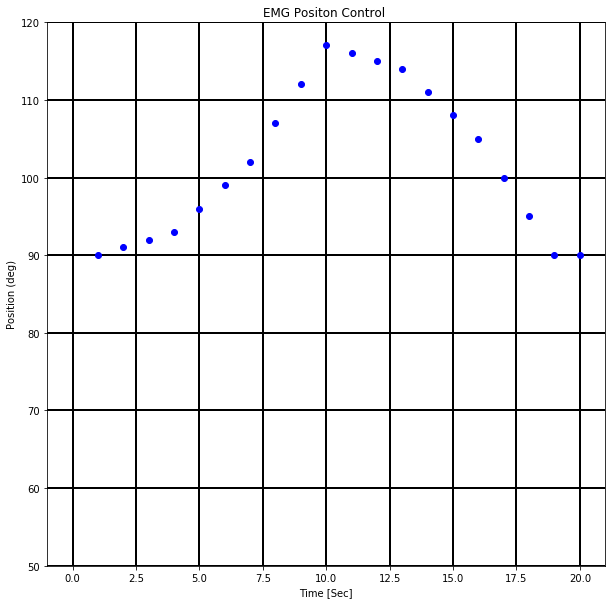

In [5]:
plt.figure(figsize=(10,10))
plt.plot(t__s, pos_setPoint, 'bo')
plt.xlabel('Time [Sec]')
plt.ylabel('Position (deg)')
plt.grid(color='k', linestyle='-', linewidth=2)
# plt.xlim([0, 70])
plt.ylim([50, 120])
plt.title('EMG Positon Control ')

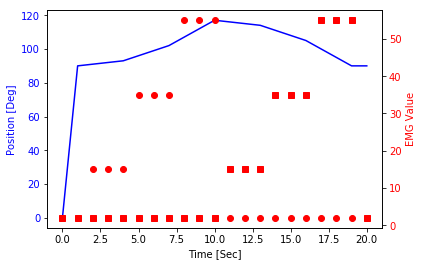

In [6]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time [Sec]')
ax1.set_ylabel('Position [Deg]', color = 'blue')
ax1.plot(t__s, pos_setPoint, 'b-')
ax1.tick_params(axis='y', labelcolor = 'blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('EMG Value', color='red')  # we already handled the x-label with ax1
ax2.plot(t__s, EMG1, 'ro')
ax2.plot(t__s, EMG2, 'rs')
ax2.tick_params(axis='y', labelcolor= 'red')

In [7]:
def test_func():
    assert EMG_Pos_Ctrl(90,15,2)  == 91, 'Should shift possition up by one' 
    assert EMG_Pos_Ctrl(90,2,15)  == 89, 'Should shift position down by one'
    assert EMG_Pos_Ctrl(90,35,2)  == 93, 'Should shift position up by three'
    assert EMG_Pos_Ctrl(90,2,35)  == 87, 'Should shift position down by three'
    assert EMG_Pos_Ctrl(90,70,2)  == 95, 'Should shift position up by 5'
    assert EMG_Pos_Ctrl(90,2,70)  == 85, 'Should shift position down by 5'
    assert EMG_Pos_Ctrl(90,2,2)   == 90, 'Should not move'
    assert EMG_Pos_Ctrl(90,15,15) == 90, 'Should not move'
    assert EMG_Pos_Ctrl(24,2,70)  == 25, 'Should hit lower limit - should not move'
    assert EMG_Pos_Ctrl(134,70,2) == 135, 'Should hit upper limit - should not move'
#     assert EMG_Pos_Ctrl('bug',5,2) == 'Invaild Inputs', 'Should throw an Exception'
#     assert EMG_Pos_Ctrl(90,'bug',2) == 'Invaild Inputs', 'Should throw an Exception'
#     assert EMG_Pos_Ctrl(90,5,'bug') == 'Invaild Inputs', 'Should throw an Exception'
    print "Everything has passed"

In [8]:
test_func()

EMG1 Delta: 13 System Pace: 0.13
Moving Up
New Setpoint: 91
Drive Pace: Slow
Return Setpoint: 91
EMG Delta: 13 System Pace 0.13
Moving Down
New Setpoint: 89
Drive Pace: Slow
Return Setpoint: 89
EMG1 Delta: 33 System Pace: 0.33
Moving Up
New Setpoint: 93
Drive Pace: Medium
Return Setpoint: 93
EMG Delta: 33 System Pace 0.33
Moving Down
New Setpoint: 87
Drive Pace: Medium
Return Setpoint: 87
EMG1 Delta: 68 System Pace: 0.68
Moving Up
New Setpoint: 95
Drive Pace: Fast
Return Setpoint: 95
EMG Delta: 68 System Pace 0.68
Moving Down
New Setpoint: 85
Drive Pace: Fast
Return Setpoint: 85
Movement threshold not reached
Return Setpoint: 90
Movement threshold not reached
Return Setpoint: 90
EMG Delta: 68 System Pace 0.68
Moving Down
New Setpoint: 19
Drive Pace: Fast
Exceded lower limit
Return Setpoint: 25
EMG1 Delta: 68 System Pace: 0.68
Moving Up
New Setpoint: 139
Drive Pace: Fast
Exceded upper Limit
Return Setpoint: 135
Everything has passed
